In [3]:
# remove "MRMR" from both includes to load all subjects
! aws s3 sync --exclude "*" --include "*.bam" --include "*.bam.bai" s3://gist-prod/media/subjects/ /mnt/vep/subjects/

download: s3://gist-prod/media/subjects/FCLR-GP08-753E/FCLR-GP08-753E.bam.bai to ../../../../mnt/vep/subjects/FCLR-GP08-753E/FCLR-GP08-753E.bam.bai
download: s3://gist-prod/media/subjects/FB1E-0000-363X/FB1E-0000-363X.bam.bai to ../../../../mnt/vep/subjects/FB1E-0000-363X/FB1E-0000-363X.bam.bai
download: s3://gist-prod/media/subjects/FCLR-GP01-2121/FCLR-GP01-2121.bam.bai to ../../../../mnt/vep/subjects/FCLR-GP01-2121/FCLR-GP01-2121.bam.bai
download: s3://gist-prod/media/subjects/FCLR-GP17-435H/FCLR-GP17-435H.bam.bai to ../../../../mnt/vep/subjects/FCLR-GP17-435H/FCLR-GP17-435H.bam.bai
download: s3://gist-prod/media/subjects/FB1E-0000-363X/FB1E-0000-363X.bam to ../../../../mnt/vep/subjects/FB1E-0000-363X/FB1E-0000-363X.bam
download: s3://gist-prod/media/subjects/FCLR-GP20-399A/FCLR-GP20-399A.bam.bai to ../../../../mnt/vep/subjects/FCLR-GP20-399A/FCLR-GP20-399A.bam.bai
download: s3://gist-prod/media/subjects/FCLR-GP17-435H/FCLR-GP17-435H.bam to ../../../../mnt/vep/subjects/FCLR-GP17-435H

In [10]:
! find /mnt/vep/subjects/ -name "*.bam*"

/mnt/vep/subjects/FCLR-GP01-2121/FCLR-GP01-2121.bam
/mnt/vep/subjects/FCLR-GP01-2121/FCLR-GP01-2121.bam.bai
/mnt/vep/subjects/FCLR-GP01-2121/FCLR-GP01-2121.bam.E357F1FD
/mnt/vep/subjects/FPWB-0000-429L/FPWB-0000-429L.bam
/mnt/vep/subjects/FPWB-0000-429L/FPWB-0000-429L.bam.bai
/mnt/vep/subjects/MRMR-0011-266B/MRMR-0011-266B.bam
/mnt/vep/subjects/MRMR-0011-266B/MRMR-0011-266B.bam.bai
/mnt/vep/subjects/FF2E-0000-361V/FF2E-0000-361V.bam
/mnt/vep/subjects/FF2E-0000-361V/FF2E-0000-361V.bam.bai
/mnt/vep/subjects/FGPC-0000-5279/FGPC-0000-5279.bam.bai
/mnt/vep/subjects/FGPC-0000-5279/FGPC-0000-5279.bam
/mnt/vep/subjects/FRMR-00SC-714V/FRMR-00SC-714V.bam.bai
/mnt/vep/subjects/FRMR-00SC-714V/FRMR-00SC-714V.bam
/mnt/vep/subjects/FRMR-00CS-821F/FRMR-00CS-821F.bam
/mnt/vep/subjects/FRMR-00CS-821F/FRMR-00CS-821F.bam.bai
/mnt/vep/subjects/FRMR-0081-1987/FRMR-0081-1987.bam
/mnt/vep/subjects/FRMR-0081-1987/FRMR-0081-1987.bam.bai
/mnt/vep/subjects/FRMR-0085-579V/FRMR-0085-579V.bam
/mnt/vep/subjects/FRMR-

In [27]:
import pysam, glob, os
import matplotlib.pyplot as plt

In [26]:
subject_bams = {'total': []}
count = 0
for root, dirs, files in os.walk('/mnt/vep/subjects'):
    for file_name in files:
        if file_name.endswith('.bam'):
            if '{}.bai'.format(file_name) not in files:
                print '{} is missing an index file'.format(file_name)
                continue

            file_path = os.path.join(root, file_name)
            subject = os.path.splitext(file_name)[0]
            subject_bams[subject] = []
            bamfile = pysam.AlignmentFile(file_path, "rb")
            for read in bamfile.fetch('X', start=31137345, end=33229636):
                if not read.is_unmapped:
                    mapq = read.mapping_quality
#                     if mapq < 20:
#                         count += 1
#                         if count < 100:
#                             print read.reference_start, read.cigarstring, read.query_sequence
                    subject_bams[subject].append(mapq)
                    subject_bams['total'].append(mapq)
            print 'finished adding mapq for {} with {} reads'.format(subject, len(subject_bams[subject]))
            bamfile.close()

finished adding mapq for FCLR-GP01-2121 with 45204 reads
finished adding mapq for MESB-0009-690N with 10258 reads
finished adding mapq for MMCB-0000-209K with 20352 reads
finished adding mapq for MESB-0009-662M with 10090 reads
finished adding mapq for MCLR-CD00-0270 with 20406 reads
finished adding mapq for FRCH-0000-0018 with 99779 reads
finished adding mapq for FPWB-0000-429L with 5845 reads
finished adding mapq for MESB-0009-568C with 27302 reads
finished adding mapq for MMCB-0005-8481 with 34936 reads
finished adding mapq for MCLR-NA20-928S with 37737 reads
finished adding mapq for MRMR-0011-266B with 35989 reads
finished adding mapq for MESB-0009-593J with 13334 reads
finished adding mapq for FF2E-0000-361V with 34085 reads
finished adding mapq for MMCB-0000-107Q with 8164 reads
finished adding mapq for MESB-0008-694G with 31098 reads
finished adding mapq for MMCB-0000-275L with 17711 reads
finished adding mapq for FPWB-0000-9879 with 66196 reads
finished adding mapq for FGPC-000

┌────────────────┬─────────────┬─────────────────┬──────────────┐
│ Subject        │ Total Reads │ % MAPQ Below 30 │ % MAPQ at 60 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ MESB-0008-703P │       10529 │          0.8358 │      98.6703 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ FGPC-0000-492E │       14700 │           0.415 │      99.4082 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ FRMR-00NC-7632 │       64463 │           0.546 │      99.0165 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ MCLR-NA03-037C │       11268 │          1.6152 │      97.6571 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ FPWB-0001-137T │        9690 │          0.4128 │      99.4221 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ MESB-0009-646G │       11542 │          0.7018 │       98.891 │
├────────────────┼─────────────┼─────────────────┼──────────────┤
│ MESB-000

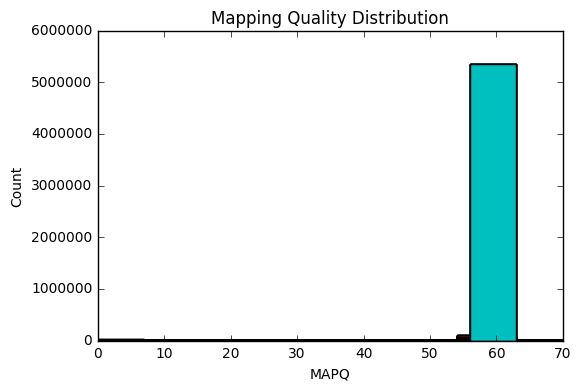

In [25]:
import tabletext

MAPQ_stats = [['Subject', 'Total Reads', '% MAPQ Below 30', '% MAPQ at 60']]
for subject, subject_mapq_distribution in subject_bams.items():
    if subject_mapq_distribution:
        count_below_30 = len([item for item in subject_mapq_distribution if item < 30])
        count_at_60 = len([item for item in subject_mapq_distribution if item == 60])
        total_reads = len(subject_mapq_distribution)
        percent_below_30 = (count_below_30 * 100.0) / len(subject_mapq_distribution)
        subject_stats = [subject, total_reads, round((count_below_30 * 100.0) / total_reads, 4), round((count_at_60 * 100.0) / total_reads, 4)]
        MAPQ_stats.append(subject_stats)
print tabletext.to_text(MAPQ_stats)

plt.hist(subject_bams['total'])
plt.title("Mapping Quality Distribution")
plt.xlabel("MAPQ")
plt.ylabel("Count")

plt.gcf()